In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML
from sklearn.utils import shuffle
import pickle
import seaborn as sns

def evaluate(y_preds, y_test, standardized = False):
    print("\n")
    print(" --- EVALUATION --- ")
    if standardized:
        y_test_unstd = scaler.inverse_transform(y_test)
        y_preds_unstd = scaler.inverse_transform(y_preds)
        print("Standardized Dataset: Don't forget that, latest scaler object should belong to 'y'!")
        print("Mean Absolute error (MAE): %.2f"% np.mean(abs(y_preds_unstd - y_test_unstd)))
        print("Root Mean squared error: %.2f"% np.sqrt(np.mean((y_preds_unstd - y_test_unstd) ** 2)))
    else:
        print("Not Standardized Dataset")
        print("Mean Absolute error (MAE): %.2f"% np.mean(abs(y_preds - y_test.values)))
        print("Root Mean squared error: %.2f"% np.sqrt(np.mean((y_preds - y_test.values) ** 2)))
    print("\n")
    
from IPython.display import display, Markdown

def round_predictions_integer(y_preds, y_test):
    rounding_df = pd.DataFrame()
    rounding_df["y_unrounded_preds"] = y_preds
    rounding_df["y_rounded_preds"] = rounding_df["y_unrounded_preds"].apply(lambda row: round(row, 0))
    rounding_df['y_test'] = y_test.values
    display(Markdown("<font color = red> <font size = 4>\nAfter rounding predictions to closest integer values:\n"))
    evaluate(rounding_df['y_rounded_preds'], rounding_df['y_test'])
    
def round_predictions_decimal(y_preds, y_test, decimal):
    rounding_df = pd.DataFrame()
    rounding_df["y_unrounded_preds"] = y_preds
    rounding_df["y_rounded_preds"] = rounding_df["y_unrounded_preds"].apply(lambda row: round(row, decimal))
    rounding_df['y_test'] = y_test.values
    if decimal == 1:
        mark = 'st'
    elif decimal == 2:
        mark = 'nd'
    elif decimal == 3:
        mark = 'rd'
    else:
        mark = 'th'
    display(Markdown("<font color = red> <font size = 4>\nAfter rounding predictions to {}{} decimal values:\n".format(decimal, mark)))
    evaluate(rounding_df['y_rounded_preds'], rounding_df['y_test'])

def percent_missing_func(df):
    percent_missing = df.isnull().sum() * 100 / df.shape[0]
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True)
    missing_value_df.reset_index(drop=True, inplace=True)
    return missing_value_df

def print_df(df):
    display(HTML(df.to_html()))
    
df_final = pd.read_csv("merged_data.csv")
#print_df(df_final.head())

categorical_labels = ['ResortName','ResortCountryName','ResortCityName','SubcategoryName']
numerical_labels = ['ElevationInfoMax', 'ElevationInfoMin', 'DistanceToAirport', 'avgSnowDepth', 'difficultKm',\
                    'easyKm', 'intermediateKm', 'skiRoutesKm']
y_label = ['Rating']
x_label = [i for i in df_final.columns if i not in y_label]

df_final = shuffle(df_final)
#print(df_final.shape)
#print_df(df_final.head())

y = df_final[y_label]
y = pd.DataFrame(y)
X = df_final[x_label]
X = pd.DataFrame(X)
#print_df(X.head())
#print_df(y.head())

X_one = pd.get_dummies(X)
X_one = pd.DataFrame(X_one)
for col in X_one.columns:
    X_one[col] = pd.to_numeric(X_one[col])
    
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_one_std = scaler.fit_transform(X_one)
X_one_std = pd.DataFrame(X_one_std)

X_one_std_num = X_one.copy()
some_features = X_one_std_num[numerical_labels]
some_features = scaler.fit_transform(some_features)
X_one_std_num[numerical_labels] = some_features
X_one_std_num = pd.DataFrame(X_one_std_num)

y_std = scaler.fit_transform(y)
y_std = pd.DataFrame(y_std)

X_train, X_test, y_train, y_test = train_test_split(X_one, y, test_size=0.20, random_state=61)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_one_std, y_std, test_size=0.20, random_state=61)
X_train_std_num, X_test_std_num, y_train_std_num, y_test_std_num = train_test_split(X_one_std_num, y_std, test_size=0.20, random_state=61)

In [2]:
filename = 'RF_Hyperparameter_GridCV.sav'
loaded_RF_grid = pickle.load(open(filename, 'rb'))
print(loaded_RF_grid.best_params_)

C:\Users\han\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\han\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 1550}


C:\Users\han\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [3]:
RF_y_preds = loaded_RF_grid.predict(X_test)
evaluate(RF_y_preds, y_test)
round_predictions_integer(RF_y_preds, y_test)
round_predictions_decimal(RF_y_preds, y_test, 1)
round_predictions_decimal(RF_y_preds, y_test, 2)
round_predictions_decimal(RF_y_preds, y_test, 3)



 --- EVALUATION --- 
Not Standardized Dataset
Mean Absolute error (MAE): 0.95
Root Mean squared error: 1.19




<font color = red> <font size = 4>
After rounding predictions to closest integer values:




 --- EVALUATION --- 
Not Standardized Dataset
Mean Absolute error (MAE): 0.45
Root Mean squared error: 0.68




<font color = red> <font size = 4>
After rounding predictions to 1st decimal values:




 --- EVALUATION --- 
Not Standardized Dataset
Mean Absolute error (MAE): 0.47
Root Mean squared error: 0.61




<font color = red> <font size = 4>
After rounding predictions to 2nd decimal values:




 --- EVALUATION --- 
Not Standardized Dataset
Mean Absolute error (MAE): 0.47
Root Mean squared error: 0.61




<font color = red> <font size = 4>
After rounding predictions to 3rd decimal values:




 --- EVALUATION --- 
Not Standardized Dataset
Mean Absolute error (MAE): 0.47
Root Mean squared error: 0.61




In [4]:
importances = loaded_RF_grid.best_estimator_.feature_importances_
df_importance = pd.DataFrame()
df_importance['Feature'] = X_train.columns
df_importance['Importances'] = list(importances)
df_importance.sort_values(by=['Importances'], ascending=False, inplace = True)
df_importance.reset_index(drop=True, inplace=True)
#print_df(df_importance.head())

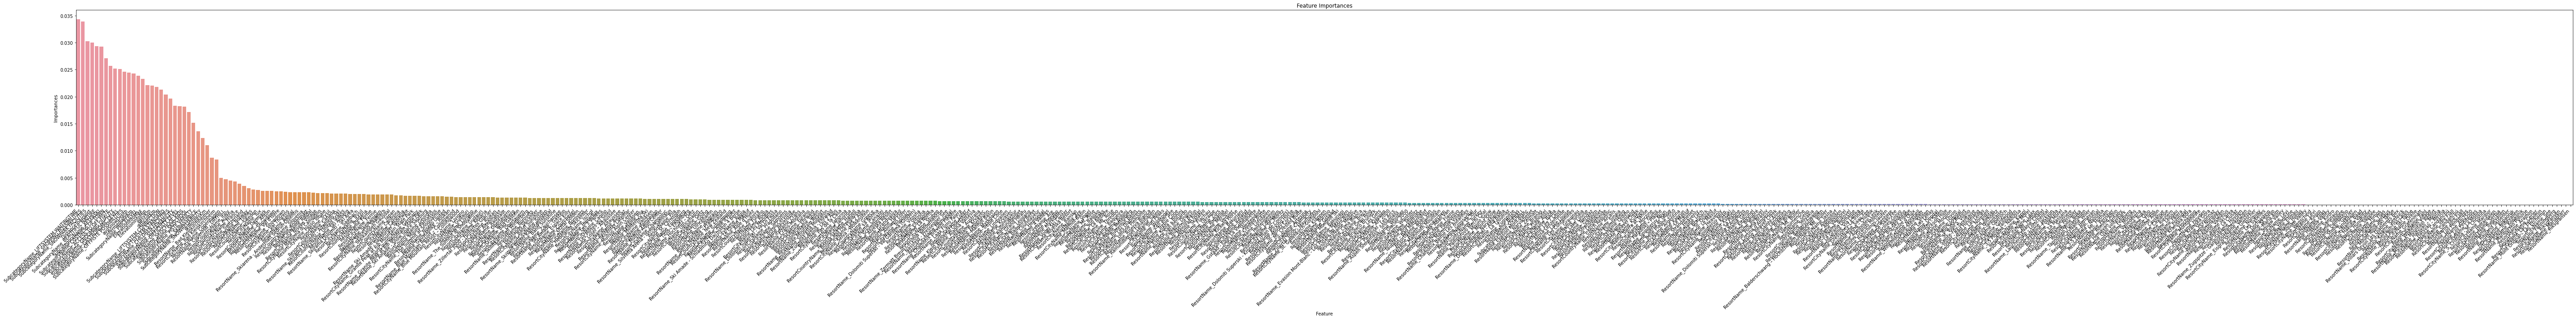

In [5]:
plt.figure(figsize=(100,8))
ax = sns.barplot(
    x = df_importance['Feature'],
    y = df_importance['Importances'])

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
#plt.savefig("output.png")
plt.title('Feature Importances')
plt.show()

Category name: ResortName -> Total Importance: 0.13289632026055542
Category name: ResortCountryName -> Total Importance: 0.0456453087787931
Category name: ResortCityName -> Total Importance: 0.15908911912312018
Category name: SubcategoryName -> Total Importance: 0.4833288935965547


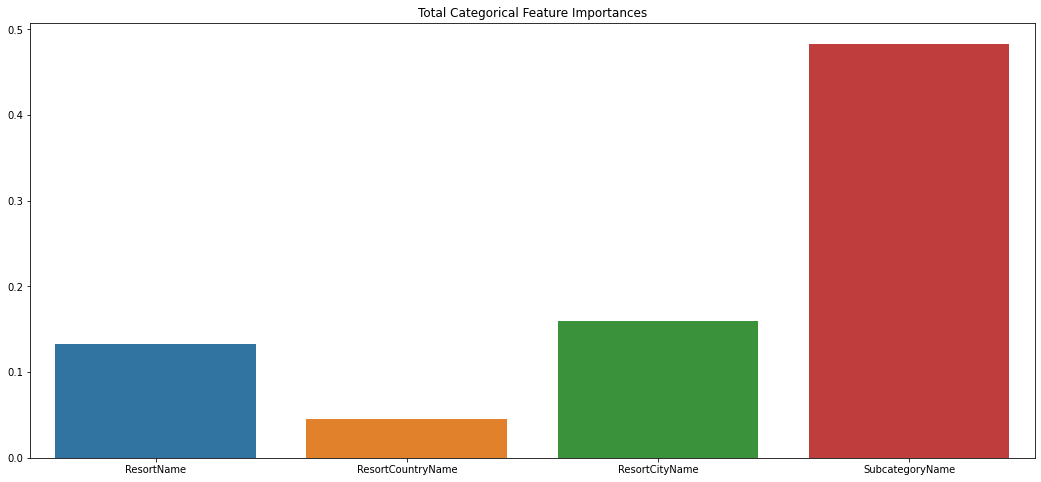

In [6]:
value_ = []
label_ = []
for i in categorical_labels:
    print('Category name: {} -> Total Importance: {}'.format(i, df_importance.loc[df_importance['Feature'].str.startswith(i)].Importances.sum()))
    value_.append(df_importance.loc[df_importance['Feature'].str.startswith(i)].Importances.sum())
    label_.append(i)    
    
    
plt.figure(figsize=(18,8))
ax = sns.barplot(
    x = label_,
    y = value_)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='center'
)
plt.savefig("output_cat.png")
plt.title('Total Categorical Feature Importances')
plt.show()

Category name: ResortName -> Average Importance: 0.0006358675610552896
Category name: ResortCountryName -> Average Importance: 0.001573976164785969
Category name: ResortCityName -> Average Importance: 0.0005806172230770807
Category name: SubcategoryName -> Average Importance: 0.021969495163479753


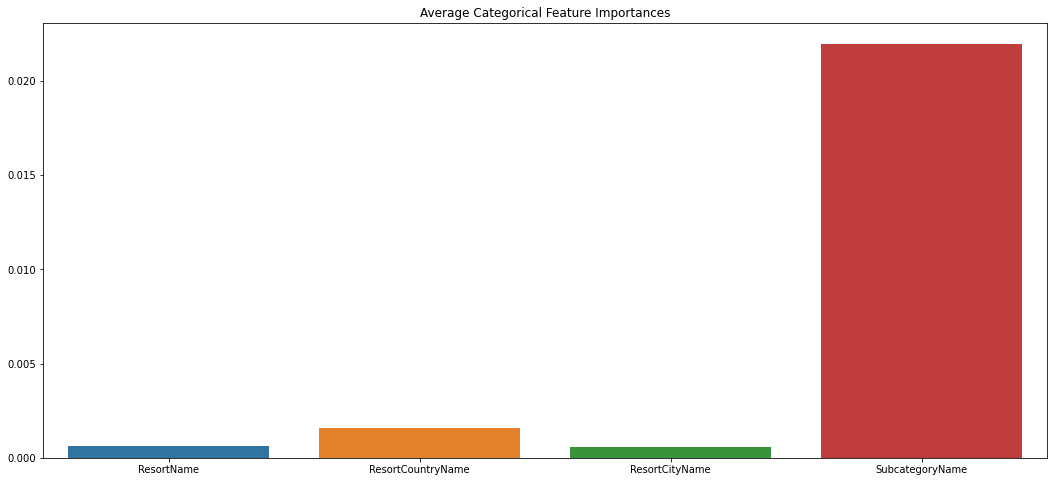

In [7]:
value2_ = []
label2_ = []
for i in categorical_labels:
    print('Category name: {} -> Average Importance: {}'.format(i, df_importance.loc[df_importance['Feature'].str.startswith(i)].Importances.mean()))
    value2_.append(df_importance.loc[df_importance['Feature'].str.startswith(i)].Importances.mean())
    label2_.append(i)    
    
    
plt.figure(figsize=(18,8))
ax = sns.barplot(
    x = label2_,
    y = value2_)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='center'
)
plt.savefig("Category_Importance_RF.png")
plt.title('Average Categorical Feature Importances')
plt.show()

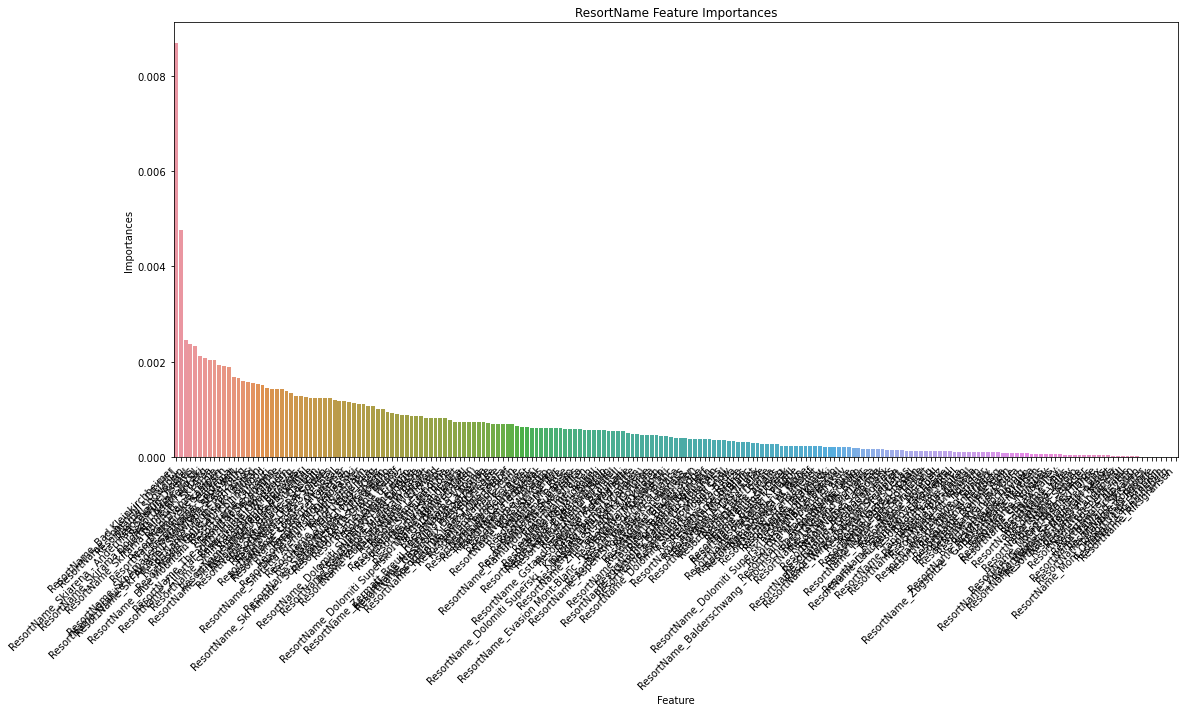

In [8]:
plt.figure(figsize=(18,8))
ax = sns.barplot(
    x = df_importance.loc[df_importance['Feature'].str.startswith(categorical_labels[0])].sort_values(by=['Importances'], ascending=False)['Feature'],
    y = df_importance.loc[df_importance['Feature'].str.startswith(categorical_labels[0])].sort_values(by=['Importances'], ascending=False)['Importances'])

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.title('{} Feature Importances'.format(categorical_labels[0]))
plt.show()

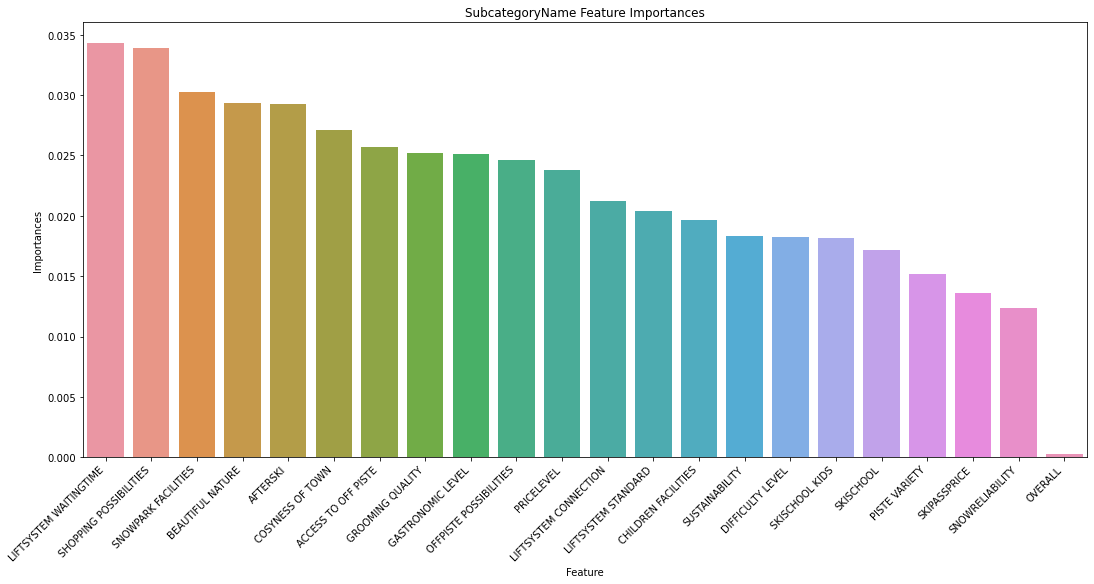

In [9]:


plt.figure(figsize=(18,8))
ax = sns.barplot(
    x = df_importance.loc[df_importance['Feature'].str.startswith(categorical_labels[3])].sort_values(by=['Importances'], ascending=False)['Feature'].str.replace('{}_'.format(categorical_labels[3]), ''),
    y = df_importance.loc[df_importance['Feature'].str.startswith(categorical_labels[3])].sort_values(by=['Importances'], ascending=False)['Importances'])

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.title('{} Feature Importances'.format(categorical_labels[3]))
plt.savefig("Sub_Category_Importance_RF.png")
plt.show()

In [10]:
print_df(pd.DataFrame.from_dict(loaded_RF_grid.cv_results_))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,422.985389,92.677351,5.738252,3.557502,True,None,sqrt,1,9,1550,"{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 1550}",-0.716172,-0.731349,-0.747533,-0.738426,-0.744365,-0.735569,0.011160,1,-0.585224,-0.578842,-0.576165,-0.579598,-0.574147,-0.578795,0.003755
1,380.280795,77.103338,7.954465,4.434192,True,None,sqrt,1,9,1600,"{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 1600}",-0.717098,-0.731483,-0.748752,-0.738289,-0.744155,-0.735955,0.011064,6,-0.585474,-0.579218,-0.576660,-0.579681,-0.574239,-0.579054,0.003756
2,618.502439,147.657822,2.717332,0.236671,True,None,sqrt,1,9,1650,"{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 1650}",-0.716131,-0.732239,-0.748094,-0.737548,-0.743947,-0.735592,0.011135,2,-0.585468,-0.578912,-0.576013,-0.579332,-0.574593,-0.578863,0.003747
3,647.956819,107.843565,4.362191,3.990252,True,None,sqrt,1,10,1550,"{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1550}",-0.716418,-0.731541,-0.747866,-0.737976,-0.745012,-0.735763,0.011216,4,-0.591542,-0.585199,-0.582596,-0.586004,-0.580435,-0.585155,0.003751
4,424.530065,188.706214,8.663066,5.092791,True,None,sqrt,1,10,1600,"{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1600}",-0.716625,-0.731718,-0.747654,-0.738110,-0.744639,-0.735749,0.011030,3,-0.591690,-0.585341,-0.582357,-0.585940,-0.580754,-0.585216,0.003756
5,632.377865,204.345476,6.514340,4.719679,True,None,sqrt,1,10,1650,"{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1650}",-0.717118,-0.731054,-0.747939,-0.738868,-0.744656,-0.735927,0.011015,5,-0.591502,-0.585232,-0.582317,-0.585911,-0.580702,-0.585133,0.003708
6,706.081482,190.798429,9.482649,3.546728,True,None,sqrt,1,12,1550,"{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 1550}",-0.718539,-0.731779,-0.749456,-0.739248,-0.747082,-0.737221,0.011222,9,-0.603183,-0.596977,-0.593942,-0.598052,-0.592829,-0.596997,0.003636
7,747.594423,153.879699,12.625011,0.738359,True,None,sqrt,1,12,1600,"{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 1600}",-0.718130,-0.731633,-0.748520,-0.738926,-0.747473,-0.736936,0.011234,7,-0.603412,-0.596838,-0.594204,-0.598015,-0.592456,-0.596985,0.003759
8,558.935405,217.110442,8.882499,5.094044,True,None,sqrt,1,12,1650,"{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 1650}",-0.718428,-0.731582,-0.748287,-0.739229,-0.747191,-0.736943,0.011050,8,-0.603372,-0.596933,-0.594134,-0.598262,-0.592560,-0.597052,0.003745
9,540.353423,277.683425,6.211058,4.611085,True,None,sqrt,1,15,1550,"{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 1550}",-0.722888,-0.731898,-0.751346,-0.743164,-0.752240,-0.740307,0.011372,12,-0.618788,-0.613410,-0.609586,-0.614114,-0.608674,-0.612914,0.003612


In [11]:
print("Best Estimator:\n{}\n".format(loaded_RF_grid.best_estimator_))
print("Best Score:\n{}\n".format(loaded_RF_grid.best_score_))
print("Best Parameters:\n{}\n".format(loaded_RF_grid.best_params_))
print("Scorer:\n{}\n".format(loaded_RF_grid.scorer_))

Best Estimator:
RandomForestRegressor(max_features='sqrt', min_samples_split=9,
                      n_estimators=1550)

Best Score:
-0.7355691236744264

Best Parameters:
{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 1550}

Scorer:
make_scorer(mean_squared_error, greater_is_better=False, squared=False)

